<a href="https://colab.research.google.com/github/SashaK2609/Airbnb_listings/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/Airbnb Python/Listings.csv'
listings_df = pd.read_csv(file_path, encoding="ISO-8859-1", dtype={5: str, 13: str})
listings_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
listings_df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [6]:
listings_df['host_response_time'].dtype

dtype('O')

In [32]:
file_path = '/content/drive/My Drive/Colab Notebooks/Airbnb Python/Reviews.csv'
reviews_df = pd.read_csv(file_path)
reviews_df

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

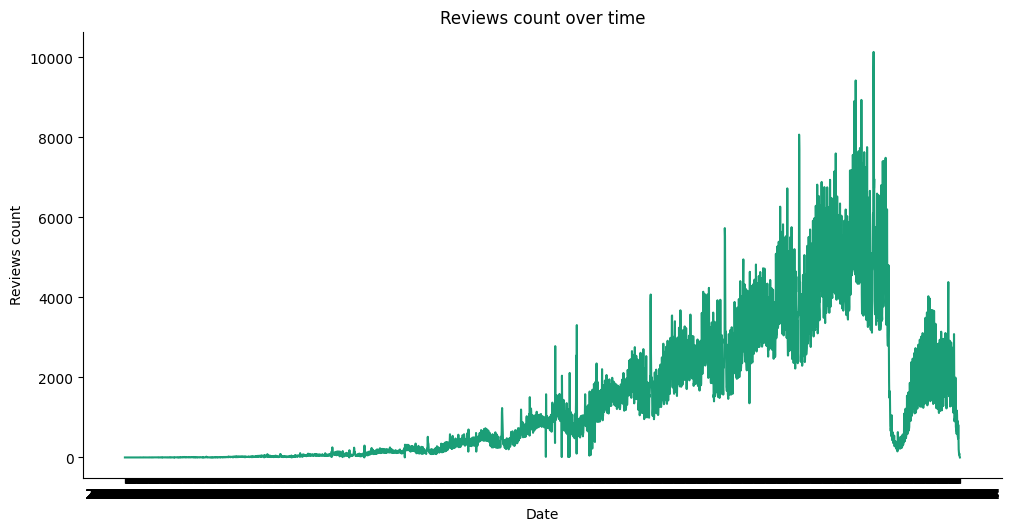

In [36]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = reviews_df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Reviews count over time')
plt.xlabel('Date')
_ = plt.ylabel('Reviews count')

Cast any date columns as a datetime format

In [8]:
listings_df['host_since'].dtype

dtype('O')

In [9]:
reviews_df['date'].dtype

dtype('O')

In [10]:
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])

In [11]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’


In [12]:
paris_listings = listings_df[(listings_df['city'] == 'Paris')]
paris_listings.iloc[:, [3, 12, 14, 19, 22]]

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [13]:
#check for any missing values
paris_listings.isnull().sum()

,0
listing_id,0
name,63
host_id,0
host_since,33
host_location,168
host_response_time,41344
host_response_rate,41344
host_acceptance_rate,32771
host_is_superhost,33
host_total_listings_count,33


In [14]:
#check if any missing values exist in thw whole table
paris_listings.isnull().values.any()

True

In [15]:
#view rows with missing data. This filters and displays rows that contain at least one NaN value.
missing_rows = listings_df[listings_df.isnull().any(axis=1)]
missing_rows

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
# Handling missing data (fillna(), dropna()) or
# Keep columns with at least 70% data
listings_df.dropna(axis=1, thresh=len(listings_df) * 0.7, inplace=True)

In [37]:
min = paris_listings.min(numeric_only=True)
min

,0
listing_id,2577.00
host_id,2626.00
host_response_rate,0.00
host_acceptance_rate,0.00
host_total_listings_count,0.00
latitude,48.81
longitude,2.23
accommodates,0.00
bedrooms,1.00
price,0.00


In [17]:
#display the number in regular format (not scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)

In [18]:
max = paris_listings.max(numeric_only=True)
max

,0
listing_id,48091852.00
host_id,387663988.00
host_response_rate,1.00
host_acceptance_rate,1.00
host_total_listings_count,1105.00
latitude,48.90
longitude,2.47
accommodates,16.00
bedrooms,50.00
price,12000.00


In [19]:
mean = paris_listings.mean(numeric_only=True)
mean

,0
listing_id,24236859.60
host_id,87963955.31
host_response_rate,0.86
host_acceptance_rate,0.81
host_total_listings_count,11.74
latitude,48.86
longitude,2.35
accommodates,3.04
bedrooms,1.37
price,113.10


Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)


In [20]:
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood').agg({'price': 'mean'})
sorted_df = paris_listings_neighbourhood.sort_values('price', ascending = False)
sorted_df

,price
neighbourhood,
Elysee,210.54
Louvre,175.38
Passy,161.14
Palais-Bourbon,156.86
Luxembourg,155.64
Bourse,149.50
Hotel-de-Ville,144.47
Temple,138.45
Pantheon,122.66


Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [39]:
most_expensive_neighbourhood = paris_listings.groupby("neighbourhood")["price"].mean().idxmax()
filtered_df = paris_listings[paris_listings["neighbourhood"] == most_expensive_neighbourhood]
grouped_df = filtered_df.groupby(["accommodates"])["price"].mean()
grouped_df = grouped_df.reset_index()
sorted_grouped_df = grouped_df.sort_values("price", ascending=True)
sorted_grouped_df

,accommodates,price
0,0,0.00
1,1,79.52
3,3,152.83
2,2,155.10
4,4,212.10
5,5,328.82
6,6,355.51
8,8,405.52
7,7,411.54
9,9,440.27


Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [22]:
paris_listings_over_time = paris_listings.groupby('host_since').agg({'price': 'mean', 'host_id': 'count'})
paris_listings_over_time

,price,host_id
host_since,,
2008-08-30,63.00,2
2008-09-09,125.00,1
2008-10-14,60.00,1
2009-01-16,89.00,9
2009-02-14,81.00,1
...,...,...
2021-02-03,95.25,4
2021-02-04,67.00,4
2021-02-05,48.00,1


In [23]:
yearly_host_count = paris_listings_over_time.resample('YE').agg({'price': 'mean', 'host_id': 'count'})
yearly_host_count

,price,host_id
host_since,,
2008-12-31,82.67,3
2009-12-31,127.57,47
2010-12-31,123.26,184
2011-12-31,123.69,332
2012-12-31,108.52,365
2013-12-31,104.16,365
2014-12-31,98.32,365
2015-12-31,100.65,365
2016-12-31,103.08,366


Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

In [24]:
import matplotlib.pyplot as plt

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

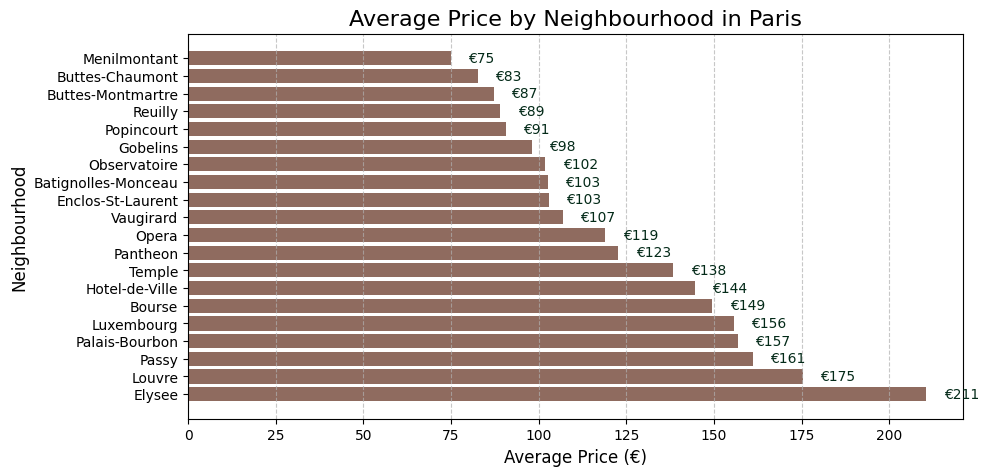

In [43]:
avg_price = sorted_df['price']
neighbours = sorted_df.index

plt.figure(figsize=(10, 5))
bar_h = plt.barh(neighbours, avg_price, color='#8f6b5f')

plt.title('Average Price by Neighbourhood in Paris', fontsize=16)
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bar_h:
  plt.text(
      bar.get_width() + 5,
      bar.get_y() + bar.get_height()/2,
             f'€{bar.get_width():.0f}',
             va='center', fontsize=10, color='#032a18')

plt.show()

Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

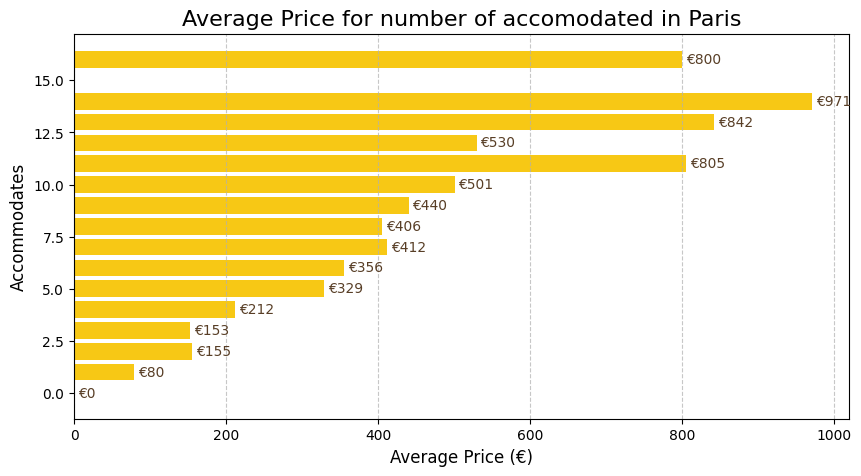

In [42]:
avg_price = sorted_grouped_df['price']
accommodates = sorted_grouped_df['accommodates']

plt.figure(figsize=(10, 5))
bar_h = plt.barh(accommodates, avg_price, color='#F7C815')

plt.title('Average Price for number of accomodated in Paris', fontsize=16)
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Accommodates', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bar_h:
  plt.text(
      bar.get_width() + 5,
      bar.get_y() + bar.get_height()/2,
             f'€{bar.get_width():.0f}',
             va='center', fontsize=10, color='#583E26')

plt.show()

Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

In [27]:
new_hosts_per_year = yearly_host_count['host_id']
new_hosts_per_year = new_hosts_per_year.reset_index()
new_hosts_per_year

,host_since,host_id
0,2008-12-31,3
1,2009-12-31,47
2,2010-12-31,184
3,2011-12-31,332
4,2012-12-31,365
5,2013-12-31,365
6,2014-12-31,365
7,2015-12-31,365
8,2016-12-31,366
9,2017-12-31,364


In [28]:
avg_price_per_year = yearly_host_count['price']
avg_price_per_year = avg_price_per_year.reset_index()
avg_price_per_year

,host_since,price
0,2008-12-31,82.67
1,2009-12-31,127.57
2,2010-12-31,123.26
3,2011-12-31,123.69
4,2012-12-31,108.52
5,2013-12-31,104.16
6,2014-12-31,98.32
7,2015-12-31,100.65
8,2016-12-31,103.08
9,2017-12-31,101.24


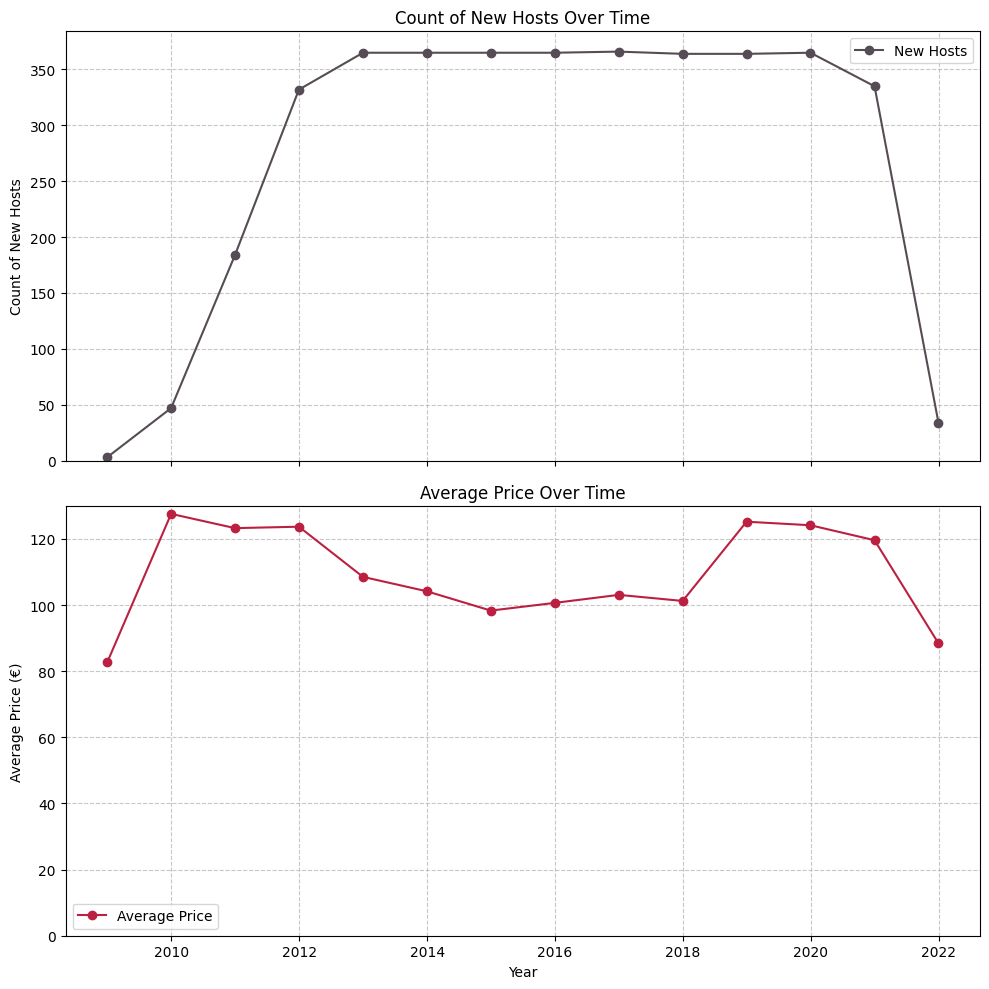

In [29]:
# Plot the two line charts
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# First chart: Count of new hosts over time
axes[0].plot(new_hosts_per_year['host_since'], new_hosts_per_year['host_id'], marker='o', linestyle='-', color='#564C55', label='New Hosts')
axes[0].set_ylabel('Count of New Hosts')
axes[0].set_ylim(0)  # Set y-axis to start from 0
axes[0].set_title('Count of New Hosts Over Time')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

# Second chart: Average price over time
axes[1].plot(avg_price_per_year['host_since'], avg_price_per_year['price'], marker='o', linestyle='-', color='#BC2041', label='Average Price')
axes[1].set_ylabel('Average Price (€)')
axes[1].set_xlabel('Year')
axes[1].set_ylim(0)  # Set y-axis to start from 0
axes[1].set_title('Average Price Over Time')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

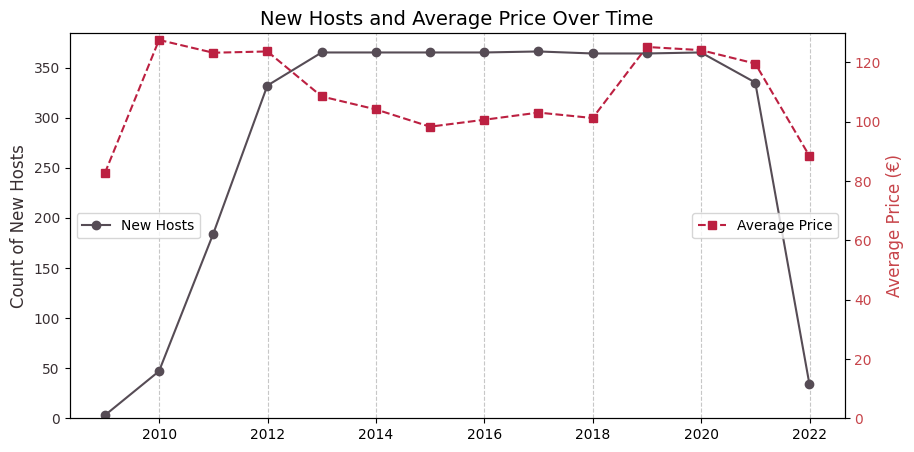

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(new_hosts_per_year['host_since'], new_hosts_per_year['host_id'],
         marker='o', linestyle='-', color='#564C55', label='New Hosts')

ax1.set_ylabel('Count of New Hosts', color='#382f32', fontsize=12)
ax1.set_ylim(0)  # Start y-axis at 0
ax1.tick_params(axis='y', labelcolor='#382f32')
ax1.set_title('New Hosts and Average Price Over Time', fontsize=14)

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(avg_price_per_year['host_since'], avg_price_per_year['price'],
         marker='s', linestyle='--', color='#BC2041', label='Average Price')

ax2.set_ylabel('Average Price (€)', color='#c7444a', fontsize=12)
ax2.set_ylim(0)  # Start y-axis at 0
ax2.tick_params(axis='y', labelcolor='#c7444a')

# Add legends
ax1.legend(loc='center left')
ax2.legend(loc='center right')

# Show grid for readability
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In 2015 with average price of €98.32 (one of the lowest in the range) Airbnb brought 365 new hosts. In 2021 we see a significant decrese of new hosts (probably due to coronavirus). 2013-2018 the lowest prices brought more new hosts